In [0]:
# Importing proper libraries

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster


from sklearn.cluster import KMeans
from sklearn import datasets

# 
np.random.seed(5)

#Use:
# !apt-get install or !pip install 
# for the missing libraries
#

In [2]:
# Downloading the sample data file
!git clone https://github.com/farbodj/PHY6795N.git

fatal: destination path 'PHY6795N' already exists and is not an empty directory.


In [0]:
# Reading the data file
#

Col1 = []
Col2 = []
AllCol = []

f=open('/content/PHY6795N/data.txt','r')
for line in f:
  if line[0]!='#':
    tmp=line.split()
    Col1.append(float(tmp[0]))
    Col2.append(float(tmp[1]))
    AllCol.append((float(tmp[0]),float(tmp[1])))
f.close()

K-means is an unsupervised clustering technique for classication of a mixed
and unclassied group of data. In this method the only known parameter is the
total number of clusters or K-variable, that must be provided by the user. The
main mechanism of this technique is clustering data based on their similarity
through the K-mean algorithm that assigns each point in one of the K number
of groups. The K-mean algorithm denes the similarity between data points
based on their distance from random centroid guesses. Therefore, its objective
is finding centroids with minimum distances from each point using the following
function:

$$A = \Sigma^k_{j=1}\Sigma^n_{i=1}||x_i^j-c_j||^2$$

where $||x_i^j-c_j||$ is the distance between the data point (i.e. $x^j_i$ ) and the centroid
$c_j$ , $k$ is the number of clusters and $n$ is the number of points.

![](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)

In [0]:
# Choosing number of clusters

k = 10
Kmeans = cluster.KMeans(n_clusters=k)

# Putting everything in a matrix

X=np.matrix(AllCol)

# K mean fitting

kmeans = Kmeans.fit(X)

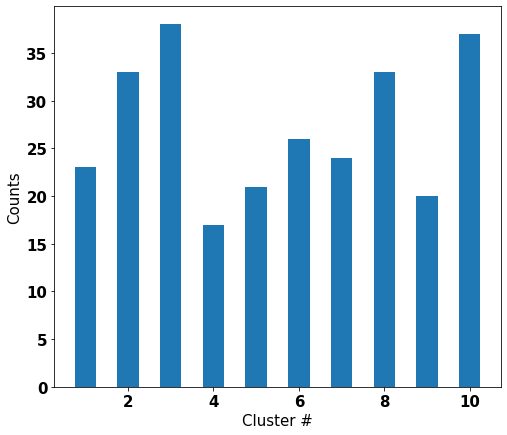

In [5]:
# labels tells us the group number of each of these classified data

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

u, inv = np.unique(labels, return_inverse=True)
counts = np.bincount(inv)

fig = plt.figure(figsize=(8, 7))
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)

plt.bar(u+1, counts, width=0.5)

plt.xlabel("Cluster #")
plt.ylabel("Counts")

plt.show()

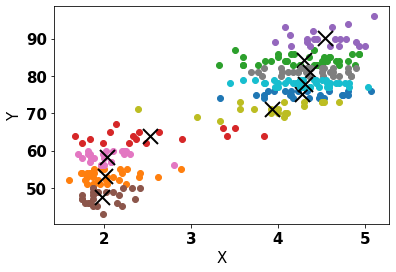

In [6]:
# Plotting the data

for i in range(k):
    # select only data observations with cluster label == i
    ds = X[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
    
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Let's say we want to classify flowers based on their petal and sepal sizes.

![alt text](https://sebastianraschka.com/images/blog/2014/linear-discriminant-analysis/iris_petal_sepal.png)

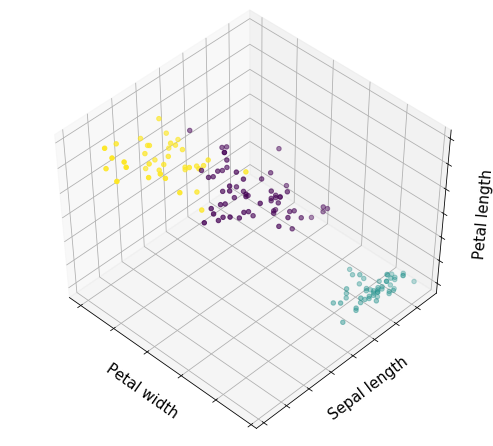

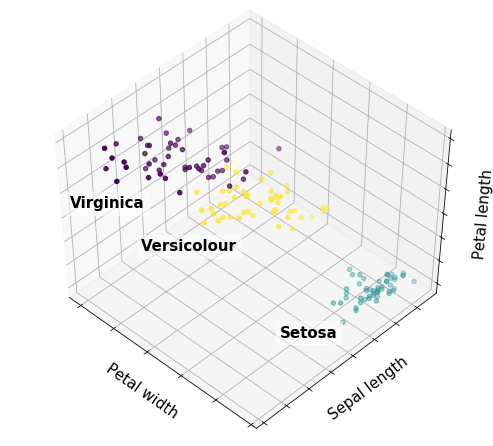

In [7]:
# Loading the iris data from the sklearn library

iris = datasets.load_iris()
X = iris.data
y = iris.target

est = KMeans(n_clusters=3)

# This time the data is 3D

fignum = 1

fig = plt.figure(fignum, figsize=(7, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
est.fit(X)
labels = est.labels_

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

fignum = fignum + 1

fig = plt.figure(fignum, figsize=(7, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

![alt text](https://camo.githubusercontent.com/c13c8f4c0909bba232ecee850ee9137820c23d43/68747470733a2f2f73332e616d617a6f6e6177732e636f6d2f6173736574732e6461746163616d702e636f6d2f626c6f675f6173736574732f697269732d6d616368696e656c6561726e696e672e706e67)